## Import Libraries

In [60]:
# Importing and loading necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error
from scipy.stats import t
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

In [22]:
# Importing data
data = pd.read_csv('/content/apple_quality.csv')
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [24]:
data.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [25]:
# Viewing data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4001 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 250.2+ KB


In [26]:
# Checking for any null values
data.isnull().sum()

Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [28]:
print("Descriptive Statistics:\n")
data.describe()

Descriptive Statistics:



,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


## Statistical Analysis

In [31]:
def calculate_statistical_moments(data_copy):
    """
    Calculate statistical moments (mean, median, standard deviation, skewness, kurtosis) for each feature in the dataset.

    Parameters:
    - data_copy (DataFrame): Input data_copy containing features.

    Returns:
    - DataFrame: DataFrame containing statistical moments for each feature.
    """
    moments = {
        'Mean': data_copy.mean(),
        'Median': data_copy.median(),
        'Standard Deviation': data_copy.std(),
        'Skewness': data_copy.skew(),
        'Kurtosis': data_copy.kurtosis()
    }
    return pd.DataFrame(moments)

def display_statistical_moments(data_copy):
    """
    Display statistical moments (mean, median, standard deviation, skewness, kurtosis) for each feature in the dataset.

    Parameters:
    - data_copy (DataFrame): Input data_copy containing features.
    """
    moments_df = calculate_statistical_moments(data_copy)
    print("\nStatistical Moments:\n")
    print(tabulate(moments_df, headers='keys', tablefmt='grid', showindex=True, numalign="center", stralign='center'))

display_statistical_moments(data_features)


Statistical Moments:

+-------------+-----------+-----------+----------------------+-------------+------------+
|             |   Mean    |  Median   |  Standard Deviation  |  Skewness   |  Kurtosis  |
+=============+===========+===========+======================+=============+============+
|    Size     | -0.503015 | -0.513703 |       1.92806        | -0.00243694 | -0.0833407 |
+-------------+-----------+-----------+----------------------+-------------+------------+
|   Weight    | -0.989547 | -0.984736 |       1.60251        | 0.00310157  |  0.35905   |
+-------------+-----------+-----------+----------------------+-------------+------------+
|  Sweetness  | -0.470479 | -0.504758 |       1.94344        |  0.0838498  | 0.0144722  |
+-------------+-----------+-----------+----------------------+-------------+------------+
| Crunchiness | 0.985478  | 0.998249  |       1.40276        | 0.000230106 |  0.72202   |
+-------------+-----------+-----------+----------------------+-------------+-

## Scatter Plot

In [32]:
# Checking the skew of the data
data_features.skew()

Size          -0.002437
Weight         0.003102
Sweetness      0.083850
Crunchiness    0.000230
Juiciness     -0.113421
Ripeness      -0.008764
Acidity        0.055783
dtype: float64

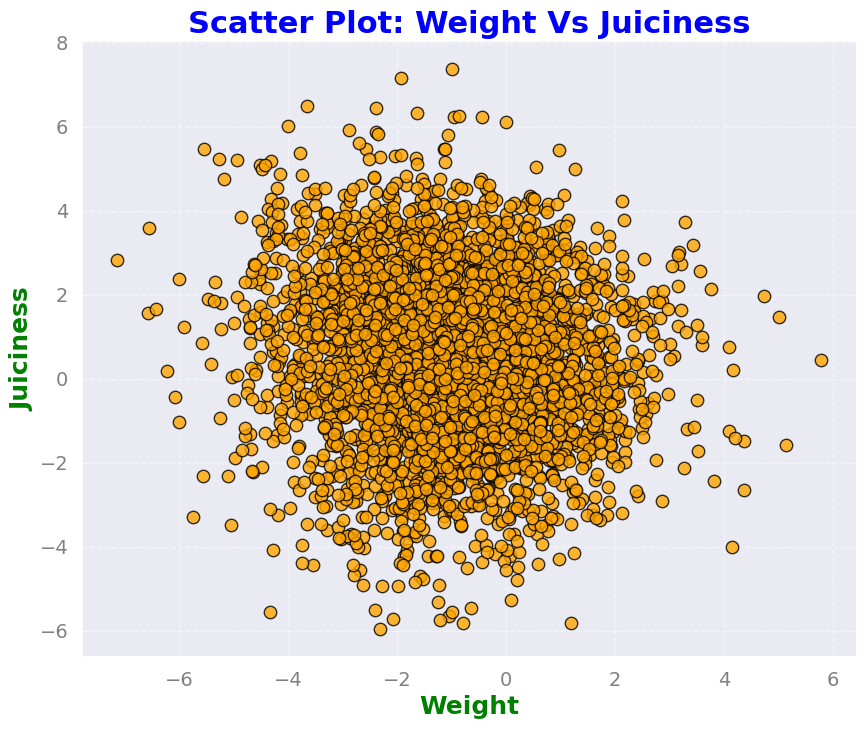

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

def scatter_plot(data, x_col, y_col, title):
    """
    Plot a scatter plot with a different style and design.

    Parameters:
    - data (DataFrame): Input data
    - x_col (str): Column name for x-axis
    - y_col (str): Column name for y-axis
    - title (str): Title of the plot
    """
    # Set style
    sns.set(style='darkgrid', font_scale=1.3)

    # Create scatter plot
    plt.figure(figsize=(10, 8))
    plt.scatter(data[x_col], data[y_col], color='orange', edgecolors='black', alpha=0.8, s=80)

    # Set title and labels
    plt.title(title, fontsize=22, fontweight='bold', color='blue')
    plt.xlabel(x_col, fontsize=18, fontweight='bold', color='green')
    plt.ylabel(y_col, fontsize=18, fontweight='bold', color='green')

    # Increase tick label font size and color
    plt.xticks(fontsize=14, color='gray')
    plt.yticks(fontsize=14, color='gray')

    # Add grid with dashed lines
    plt.grid(True, linestyle='--', linewidth=1, alpha=0.5)

    plt.show()

# Example usage
scatter_plot(data, 'Weight', 'Juiciness', 'Scatter Plot: Weight Vs Juiciness')


## Histograms

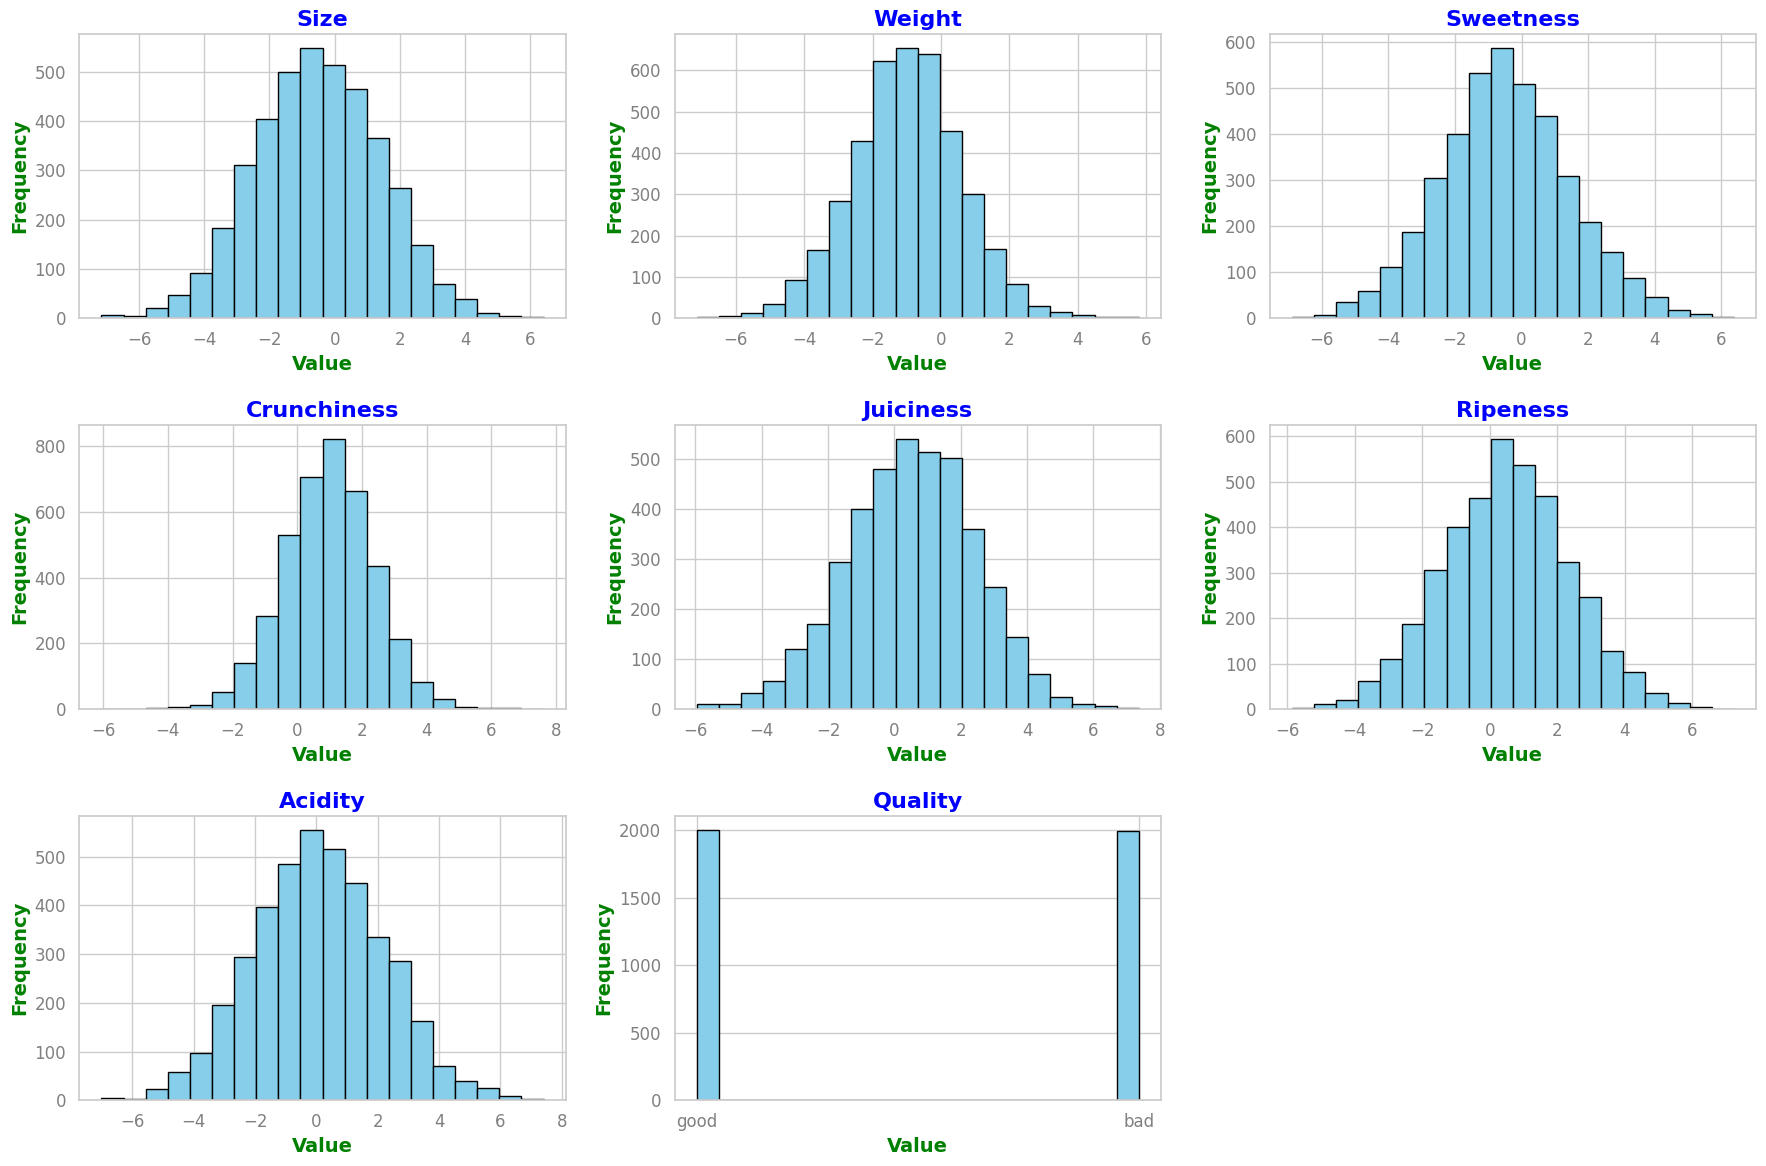

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histograms(data):
    """
    Plot histograms of features to view data distribution.

    Parameters:
    - data (DataFrame): Input data
    """
    # Set style
    sns.set(style='whitegrid', font_scale=1.5)

    # Calculate number of rows and columns for subplots
    num_cols = len(data.columns)
    num_rows = (num_cols + 2) // 3  # Ensure at least 3 columns per row

    # Create subplots
    fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 4 * num_rows))

    # Flatten axes for easy iteration
    ax_flat = axes.flatten()

    # Plot histograms for each feature
    for i, col in enumerate(data.columns):
        ax = ax_flat[i]
        ax.hist(data[col], bins=20, color='skyblue', edgecolor='black')
        ax.set_title(col, fontsize=16, fontweight='bold', color='blue')
        ax.set_xlabel('Value', fontsize=14, fontweight='bold', color='green')
        ax.set_ylabel('Frequency', fontsize=14, fontweight='bold', color='green')
        ax.tick_params(axis='both', which='major', labelsize=12, colors='gray')

    # Hide unused subplots
    for j in range(num_cols, num_rows * 3):
        fig.delaxes(ax_flat[j])

    plt.tight_layout()
    plt.show()

# Example usage
plot_histograms(data)


## Correlation Matrix

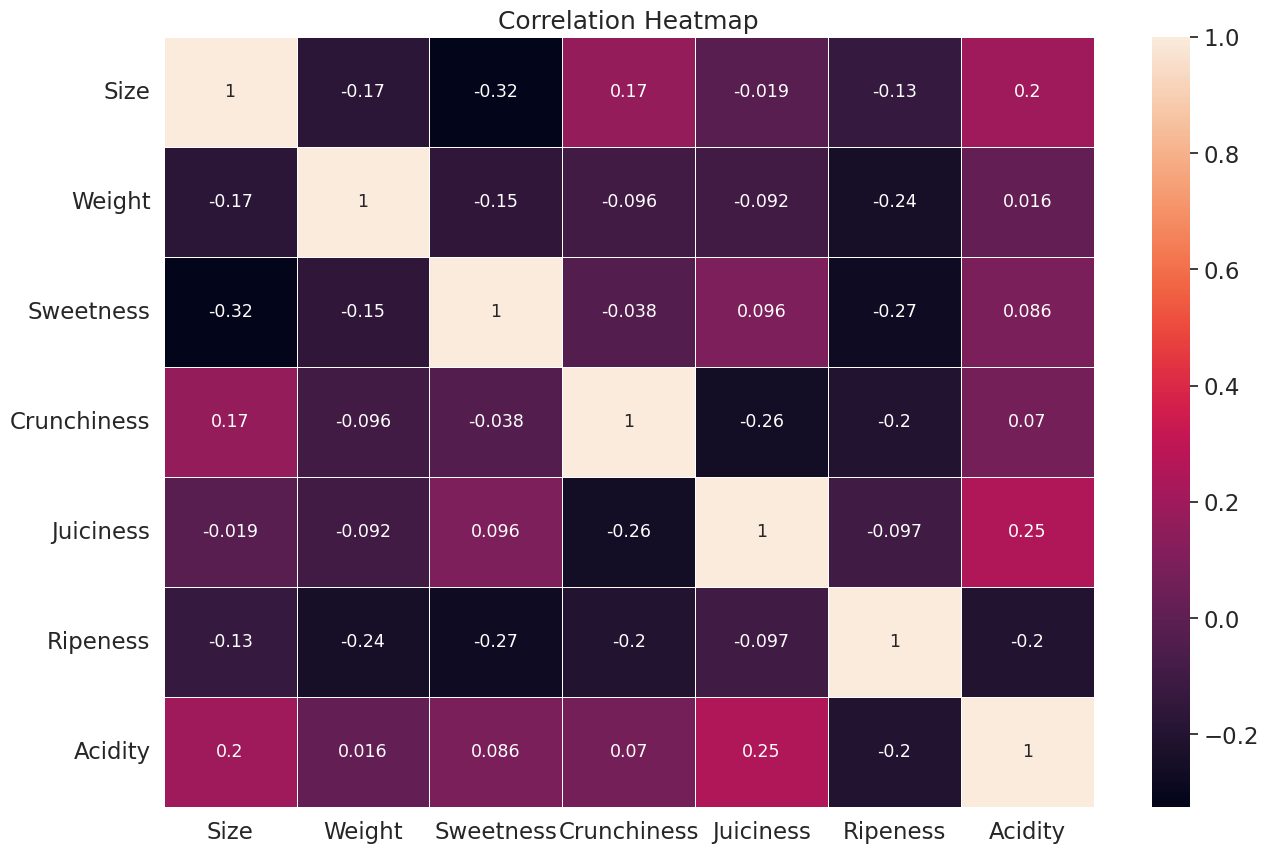

In [35]:
def plot_correlation_heatmap(data):
    """
    Plot a correlation heatmap.

    Parameters:
    - data (DataFrame): Input data
    """
    plt.figure(figsize=(15, 10))
    sns.heatmap(data.corr(), annot=True, annot_kws={'size': 'x-small'}, linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()

plot_correlation_heatmap(data_features)

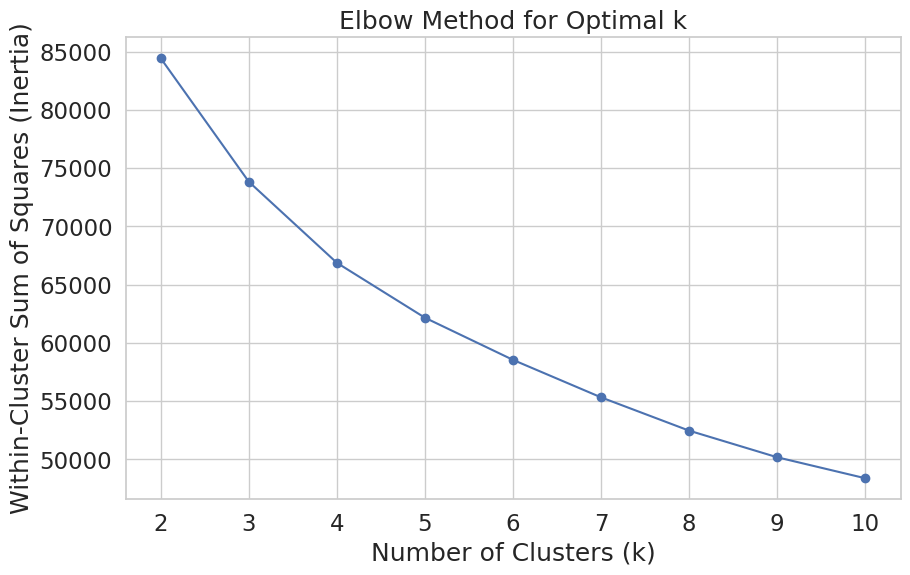

In [61]:
# Extract features for clustering (exclude the 'quality' column)

# Initialize lists to store inertia values
inertia_values = []

# Test different values of k (number of clusters)
k_values = range(2, 11)  # Test k from 2 to 10

for k in k_values:
    # Create KMeans clustering model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_features)

    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


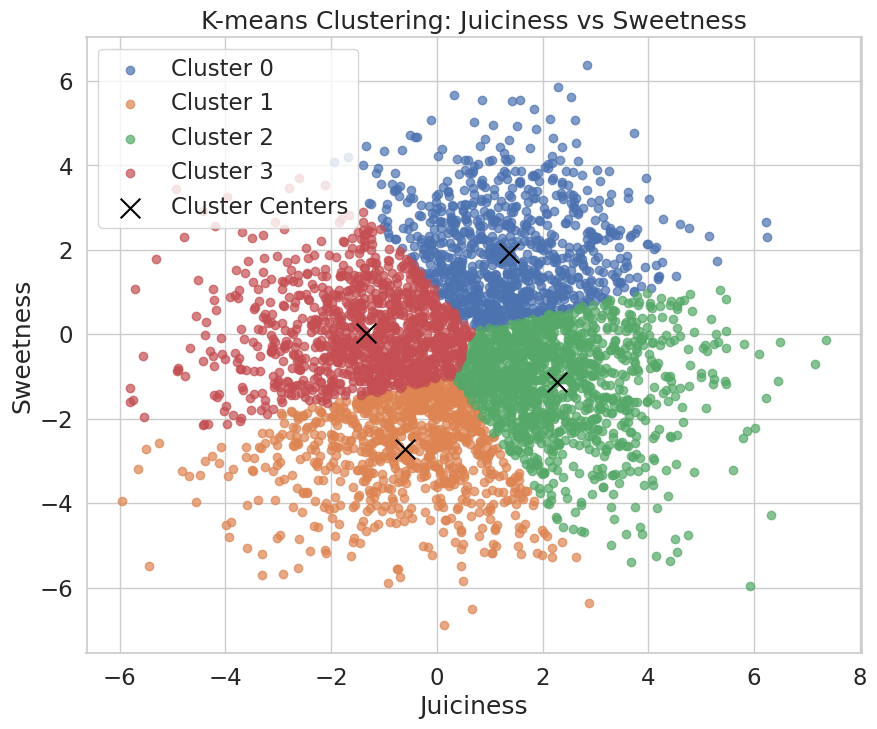

In [37]:
# Perform K-means clustering
km = KMeans(n_clusters=4, random_state=42)  # Specify the number of clusters
data_features['cluster'] = km.fit_predict(data_features[['Juiciness', 'Sweetness']])  # Fit K-means and assign cluster labels

# Plot clusters with cluster centers
plt.figure(figsize=(10, 8))

# Plot each cluster using a different color
for cluster_label in sorted(data_features['cluster'].unique()):
    cluster_data = data_features[data_features['cluster'] == cluster_label]
    plt.scatter(cluster_data['Juiciness'], cluster_data['Sweetness'], label=f'Cluster {cluster_label}', alpha=0.7)

# Plot cluster centers
cluster_centers = km.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, c='black', label='Cluster Centers')

# Set plot title and labels
plt.title('K-means Clustering: Juiciness vs Sweetness')
plt.xlabel('Juiciness')
plt.ylabel('Sweetness')

# Add legend
plt.legend()
plt.grid(True)
#plt.savefig('6.png', dpi=300)
plt.show()

In [9]:
def fit_linear_regression_model(data,x_data,y_data):
    """
    Fits a linear regression model.

    Parameters:
    - x (array-like): Input feature data (Juiciness)
    - y (array-like): Target feature data (Sweetness)
    - model: Fitted linear regression model

    Returns:
    - model: Fitted linear regression model
    """
    # Extracting the features
    x = x_data.values.reshape(-1, 1)
    y = y_data.values

    # Perform linear regression
    model = LinearRegression()
    model.fit(x, y)

    return model

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from sklearn.metrics import mean_squared_error

def plot_line_fitting(x, y, model):
    """
    Visualizes the linear regression results with a different style and design.

    Parameters:
    - x (array-like): Input feature data
    - y (array-like): Target feature data
    - model: Fitted linear regression model
    """
    # Create figure and axis objects
    fig, ax = plt.subplots(figsize=(8, 6))

    # Convert x to a NumPy array and reshape
    x_np = np.array(x).reshape(-1, 1)

    # Predictions from the model
    y_pred = model.predict(x_np)

    # Calculate standard error
    mse = mean_squared_error(y, y_pred)
    se = np.sqrt(mse / (len(y) - 2))

    # Calculate t-statistic for 95% confidence interval
    t_value = t.ppf(0.975, len(y) - 2)
    confidence_interval = t_value * se

    # Plot data points
    ax.scatter(x, y, label='Data', s=80, color='blue', alpha=0.8, edgecolor='black')

    # Plot regression line
    ax.plot(x, y_pred, color='orange', label='Linear Regression', linewidth=2)

    # Plot confidence interval
    ax.fill_between(x, y_pred - confidence_interval, y_pred + confidence_interval, color='gray', alpha=0.2)

    # Set title and labels
    ax.set_title("Linear Regression with Confidence Interval", fontsize=18, fontweight='bold', color='navy')
    ax.set_xlabel("Sweetness", fontsize=14, fontweight='bold', color='green')
    ax.set_ylabel("Juiciness", fontsize=14, fontweight='bold', color='green')

    # Set tick label font size and color
    ax.tick_params(axis='both', which='major', labelsize=12, colors='gray')

    # Add legend and grid
    ax.legend(fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()


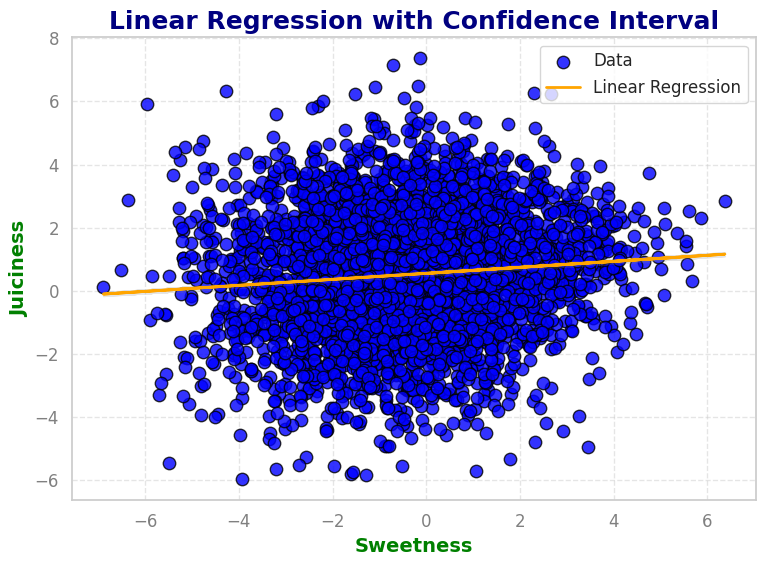

In [59]:
# Example usage
x_data = data['Sweetness']
y_data = data['Juiciness']
linear_model = fit_linear_regression_model(data,x_data,y_data)
plot_line_fitting(x_data, y_data, linear_model)